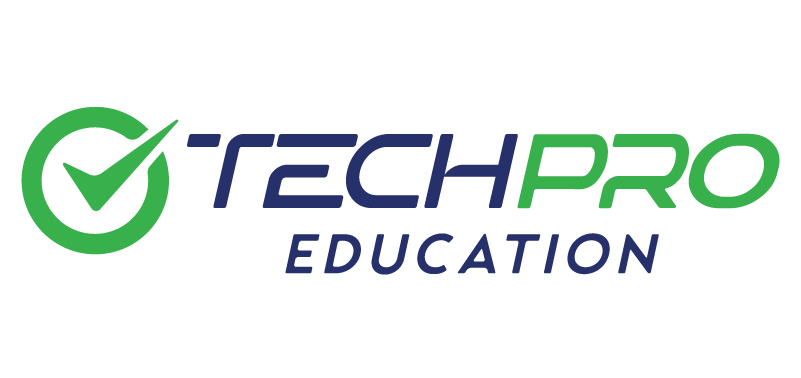

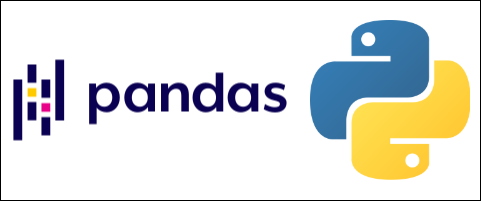

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

# Useful Operations

## pivot() vs pivot_table()

pivot(): verileri bir DataFrame'den başka bir DataFrame'e dönüştürür ve verileri bir sütuna göre gruplar. Bu yöntem, verileri yeni bir yapıya dönüştürmek için kullanılırken, herhangi bir toplama veya gruplama işlevi gerçekleştirmez. Duplicated değerler olduğunda kullanılamaz.

pivot_table(): bir veya daha fazla sütuna göre gruplama işlemi gerçekleştirir ve sonuç olarak bir özet tablosu oluşturur. Bu yöntem, verilerin toplama, ortalama, medyan, minimum, maksimum, sayma gibi işlemlerle gruplanması ve özetlenmesi için kullanılır. Duplicated değerler olduğunda kullanışlıdır.

[SOURCE01](https://www.quora.com/In-pandas-whats-the-difference-between-dataframe-pivot-and-dataframe-pivot_table),
[SOURCE02](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html),
[SOURCE03](https://www.w3resource.com/pandas/dataframe/dataframe-pivot.php),
[SOURCE04](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html),
[SOURCE05](https://www.analyticsvidhya.com/blog/2020/03/pivot-table-pandas-python/),
[SOURCE06](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)

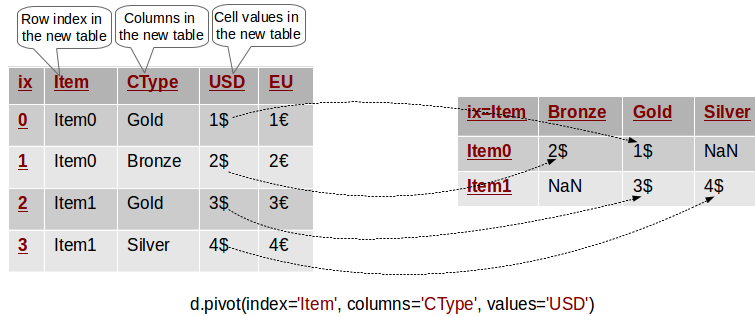

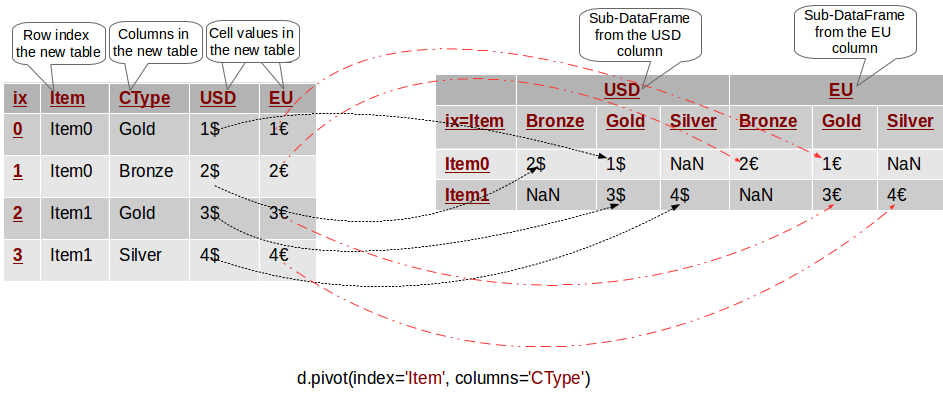

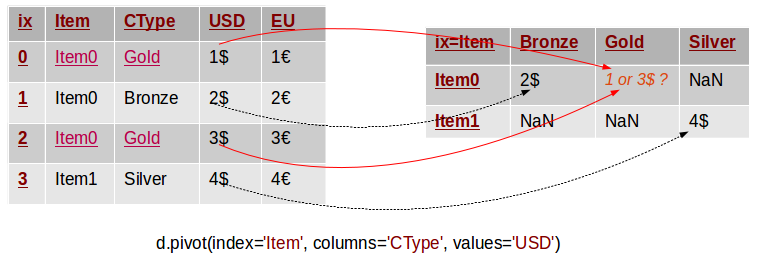

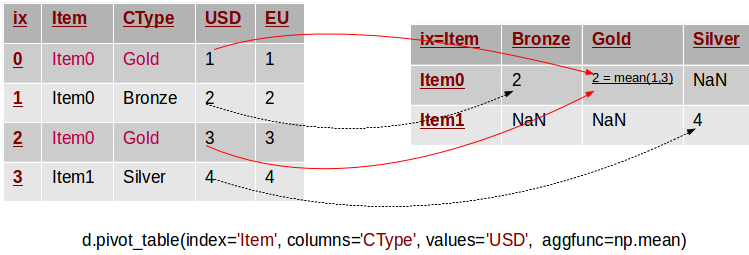

In [2]:
data = {'gender':['male', 'female', 'female', 'male', 'female', 'male'],
        'sport':['tennis', 'tennis', 'basketball', 'football', 'voleyball', 'basketball'],
        'status':["professional","professional","professional","amateur","amateur","amateur"],
        'age':[20, 24, 26, 23, 22, 21],
        'height':[185, 172, 175, 178, 182, 196],
        'weight':[83, 58, 62, 80, 65, 90]}

df = pd.DataFrame(data)
df

,gender,sport,status,age,height,weight
0,male,tennis,professional,20,185,83
1,female,tennis,professional,24,172,58
2,female,basketball,professional,26,175,62
3,male,football,amateur,23,178,80
4,female,voleyball,amateur,22,182,65
5,male,basketball,amateur,21,196,90


In [3]:
df.pivot(index="gender", columns="sport", values=["age"])

age                          
sport  basketball football tennis voleyball
gender                                     
female       26.0      NaN   24.0      22.0
male         21.0     23.0   20.0       NaN

In [4]:
df.pivot_table(index="gender", columns="sport", values=["age"])

age                          
sport  basketball football tennis voleyball
gender                                     
female       26.0      NaN   24.0      22.0
male         21.0     23.0   20.0       NaN

In [5]:
df.pivot(index="gender", columns="sport", values=["age", "height", "weight"])

age                               height                  \
sport  basketball football tennis voleyball basketball football tennis   
gender                                                                   
female       26.0      NaN   24.0      22.0      175.0      NaN  172.0   
male         21.0     23.0   20.0       NaN      196.0    178.0  185.0   

                     weight                            
sport  voleyball basketball football tennis voleyball  
gender                                                 
female     182.0       62.0      NaN   58.0      65.0  
male         NaN       90.0     80.0   83.0       NaN

In [6]:
df.pivot(index="gender", columns="sport", values=["status"])

status                                 
sport     basketball football        tennis voleyball
gender                                               
female  professional      NaN  professional   amateur
male         amateur  amateur  professional       NaN

In [7]:
df.pivot_table(index="gender", columns="sport", values=["status"])

C:\Users\Mustafa\AppData\Local\Temp\ipykernel_9596\1496901060.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(index="gender", columns="sport", values=["status"])


gender
female
male


In [8]:
df

,gender,sport,status,age,height,weight
0,male,tennis,professional,20,185,83
1,female,tennis,professional,24,172,58
2,female,basketball,professional,26,175,62
3,male,football,amateur,23,178,80
4,female,voleyball,amateur,22,182,65
5,male,basketball,amateur,21,196,90


In [9]:
df.loc[2, "sport"] = "tennis"
df

,gender,sport,status,age,height,weight
0,male,tennis,professional,20,185,83
1,female,tennis,professional,24,172,58
2,female,tennis,professional,26,175,62
3,male,football,amateur,23,178,80
4,female,voleyball,amateur,22,182,65
5,male,basketball,amateur,21,196,90


In [10]:
df.pivot(index="gender", columns="sport", values=["age"])

ValueError: Index contains duplicate entries, cannot reshape

In [11]:
df.pivot_table(index="gender", columns="sport", values=["age"])

age                          
sport  basketball football tennis voleyball
gender                                     
female        NaN      NaN   25.0      22.0
male         21.0     23.0   20.0       NaN

In [12]:
df.pivot_table(index="gender", columns="sport", values=["age"], aggfunc="min")

age                          
sport  basketball football tennis voleyball
gender                                     
female        NaN      NaN   24.0      22.0
male         21.0     23.0   20.0       NaN

In [13]:
df

,gender,sport,status,age,height,weight
0,male,tennis,professional,20,185,83
1,female,tennis,professional,24,172,58
2,female,tennis,professional,26,175,62
3,male,football,amateur,23,178,80
4,female,voleyball,amateur,22,182,65
5,male,basketball,amateur,21,196,90


# Missing Values

## Type of NaN Values

[SOURCE01](https://www.educative.io/edpresso/what-is-the-none-keyword-in-python), 
[SOURCE02](https://stackoverflow.com/questions/21095654/what-is-a-nonetype-object),
[SOURCE03](https://www.skytowner.com/explore/difference_between_none_and_nan_in_pandas), 
[SOURCE04](https://kegui.medium.com/what-is-the-difference-between-nan-none-pd-nan-and-np-nan-a8ee0532e2eb),
[SOURCE05](https://stackoverflow.com/questions/53436339/difference-between-np-nan-and-np-nan),
[SOURCE06](https://stackoverflow.com/questions/40309789/difference-between-nan-and-nan-in-python),
[SOURCE07](https://towardsdatascience.com/navigating-the-hell-of-nans-in-python-71b12558895b)

**None**:
   - Python'da "hiçbir şey" anlamına gelir.
   - Python'da bir nesnenin değeri olmadığını göstermek için kullanılır.
   - Tipi NoneType'dır ve sadece tek bir değeri vardır: None.
   - Örneğin, bir fonksiyonun herhangi bir değer döndürmemesi durumunda, Python otomatik olarak None döndürür.
   
**nan ve NaN**:
   - "Not a Number" ifadesinin kısaltmasıdır.
   - float tipinde bir değeri temsil eder.
   - Sayısal olmayan değerleri göstermek için kullanılır. 
   - Pandas ve Numpy gibi kütüphanelerde, kayıp veriyi (missing data) temsil etmek için de kullanılır.
   - nan değerleri eşitlikle karşılaştırıldığında her zaman False döndürür. Yani, nan == nan ifadesi False sonucunu verir. 
   - nan ve NaN arasında teknik bir fark yoktur. Farklı kaynaklarda veya kütüphanelerde farklı yazım biçimleri tercih edilir, ancak ikisi de aynı anlama gelir.

**Özetle**:
- None Python'ın özgün bir değeridir ve "değer yok" anlamına gelir.
- nan veya NaN sayısal olmayan değerleri temsil eder ve genellikle kayıp veri veya matematiksel olarak tanımlanmayan işlemler için kullanılır. 

Bu iki değer farklı tiplere aittir ve farklı durumlar için kullanılır. 

Uygulamada, veri analizi yaparken Pandas'ta sıkça NaN değerleriyle karşılaşırsınız. Ancak genel Python programlamasında None daha yaygındır.

In [14]:
id_no = ["P001", "P002", "P003", "P004", "P005", "P006", "P007", "P008", "P009", "P010", "P011"]
gender = ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M"]
status = ["FT", "PT", "-", "FT", "PT", "PT", "FT", "-", "PT", "FT", np.nan]
dept = ["DS", "FS", "AWS", "AWS", "DS", None, "FS", "FS", np.nan, "DS", "AWS"]
V1 = np.array([2, 3, 5, np.nan, 7, 1, np.nan, 10, 14, "-", 6])
V2 = np.array([8, np.nan, 5, 8, 11, np.nan, np.nan, 2, 3, 7, 9])
salary = np.array([np.nan, 54, 59, 120, 58, 75, None, 136, 60, 125, np.nan])

df0 = pd.DataFrame({
                   "id" : id_no,
                   "gender": gender,
                   "status": status,
                   "dept": dept,
                   "var1" : V1,
                   "var2" : V2,
                   "salary" : salary
                  })

In [15]:
df = df0.copy()
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    11 non-null     object 
 5   var2    8 non-null      float64
 6   salary  8 non-null      object 
dtypes: float64(1), object(6)
memory usage: 748.0+ bytes


In [17]:
type(np.nan)

float

In [18]:
type(np.NaN)

float

In [19]:
type(None)

NoneType

In [20]:
pd.Series([1, np.nan, np.NaN, None, 2])

0    1.0
1    NaN
2    NaN
3    NaN
4    2.0
dtype: float64

In [21]:
print("1", 0 * np.nan)
print("2", np.nan - np.nan)
print("3", np.nan + np.nan)
print("4", np.nan - 10)
print("5", np.nan + 10)
print("6", np.nan == np.nan) # değer olarak eşit değil. çünkü belirsiz.
print("7", 10 > np.nan)
print("8", np.inf > np.nan) # değeri belirsiz olduğu için
                    # sonsuz > nan diye sorguladığımızda bile false veriyor
print("9", float('-inf') < np.nan < float('inf')) # nan, eksi sonsuz ile artı sonsuz arasına düşen bir değer de değildir.
print("10", np.nan is np.nan) # is ile sorgulama yaptığınızda id değerlerini yani;
# memory location'ını sorgulamış olursunuz ki bu değerler aynıdır.
# Fakat bu; value'ları aynı demek değildir.

1 nan
2 nan
3 nan
4 nan
5 nan
6 False
7 False
8 False
9 False
10 True


## Detecting Missing Values

In [22]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [23]:
df.isnull()

,id,gender,status,dept,var1,var2,salary
0,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,True,False,True,False
6,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False


In [24]:
df.isna()   # isnull ile aynı

,id,gender,status,dept,var1,var2,salary
0,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,True,False,True,False
6,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False


In [25]:
df.notnull()

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,True,False,False
7,True,True,True,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,True,True,True


In [26]:
df.notna()   # notnull ile aynı

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,True,False,False
7,True,True,True,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,True,True,True


In [29]:
df.isnull().any()   # axis=0

id        False
gender    False
status     True
dept       True
var1      False
var2       True
salary     True
dtype: bool

In [32]:
df.isnull().any(axis=1)

0      True
1      True
2     False
3     False
4     False
5      True
6      True
7     False
8      True
9     False
10     True
dtype: bool

In [33]:
df[df.isnull().any(axis=1)]

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
8,P009,M,PT,NaN,14,3.0,60
10,P011,M,NaN,AWS,6,9.0,NaN


In [34]:
df[~df.isnull().any(axis=1)]

,id,gender,status,dept,var1,var2,salary
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
7,P008,F,-,FS,10,2.0,136
9,P010,F,FT,DS,-,7.0,125


In [36]:
df.isnull().sum()

id        0
gender    0
status    1
dept      2
var1      0
var2      3
salary    3
dtype: int64

In [37]:
df.isnull().sum().sum()

9

In [41]:
df.salary.isnull().sum()

3

## Converting Improper Values to NaN Values

In [42]:
df["var1"]

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [43]:
df["var1"] = df["var1"].replace(to_replace="-", value=np.nan).astype("float")
df["var1"] 

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [44]:
df["status"]

0      FT
1      PT
2       -
3      FT
4      PT
5      PT
6      FT
7       -
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [45]:
df["status"] = df["status"].replace("-", np.nan)
df["status"]

0      FT
1      PT
2     NaN
3      FT
4      PT
5      PT
6      FT
7     NaN
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [46]:
df0.isnull().sum().sum()

9

In [47]:
df.isnull().sum().sum()

14

## Missing Value Handling Methods

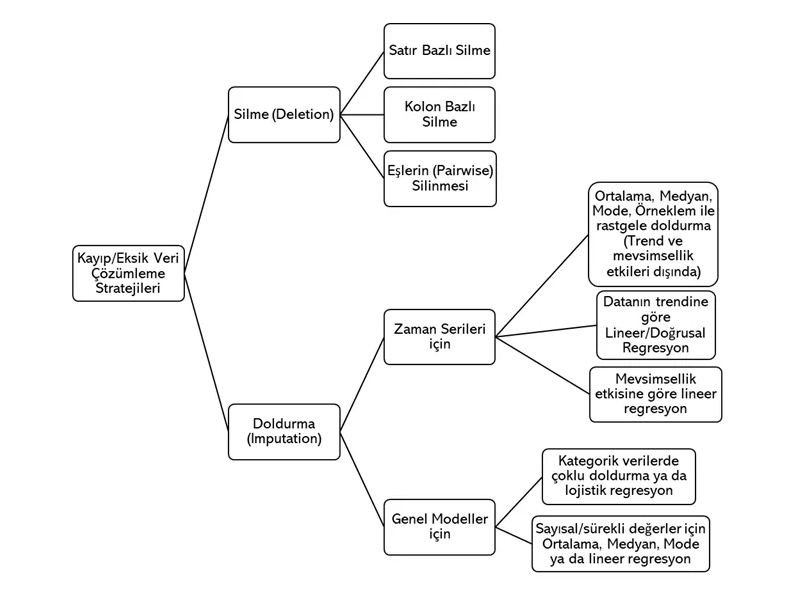

[SOURCE01](https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e), 
[SOURCE02](https://www.shiksha.com/online-courses/articles/handling-missing-values-beginners-tutorial/),
[SOURCE03](https://medium.com/geekculture/how-to-deal-with-missing-values-in-machine-learning-98e47f025b9c), 
[SOURCE04](https://yigitsener.medium.com/veri-biliminde-eksik-kay%C4%B1p-verilere-yakla%C5%9F%C4%B1m-stratejileri-ve-python-pandas-uygulamas%C4%B1-501fbf643795)

## dropna() & drop()

In [48]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [49]:
df.dropna(axis=0, how="any", inplace=False)

,id,gender,status,dept,var1,var2,salary
4,P005,M,PT,DS,7.0,11.0,58


In [50]:
df.dropna(axis=0, how="all", inplace=False)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [51]:
df.dropna(axis=1, how="any", inplace=False)

,id,gender
0,P001,M
1,P002,F
2,P003,M
3,P004,F
4,P005,M
5,P006,F
6,P007,M
7,P008,F
8,P009,M
9,P010,F


In [52]:
df.drop([1,3,5,7,9])

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
2,P003,M,NaN,AWS,5.0,5.0,59
4,P005,M,PT,DS,7.0,11.0,58
6,P007,M,FT,FS,NaN,NaN,None
8,P009,M,PT,NaN,14.0,3.0,60
10,P011,M,NaN,AWS,6.0,9.0,NaN


In [53]:
df.drop(["var1", "var2"], axis=1)

,id,gender,status,dept,salary
0,P001,M,FT,DS,NaN
1,P002,F,PT,FS,54
2,P003,M,NaN,AWS,59
3,P004,F,FT,AWS,120
4,P005,M,PT,DS,58
5,P006,F,PT,None,75
6,P007,M,FT,FS,None
7,P008,F,NaN,FS,136
8,P009,M,PT,NaN,60
9,P010,F,FT,DS,125


## Filling Missing Values (Imputation)

### Filling Numeric Variables

In [54]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [55]:
df.fillna(0)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,0
1,P002,F,PT,FS,3.0,0.0,54
2,P003,M,0,AWS,5.0,5.0,59
3,P004,F,FT,AWS,0.0,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,0,1.0,0.0,75
6,P007,M,FT,FS,0.0,0.0,0
7,P008,F,0,FS,10.0,2.0,136
8,P009,M,PT,0,14.0,3.0,60
9,P010,F,FT,DS,0.0,7.0,125


In [56]:
df["var1"].fillna(0)

0      2.0
1      3.0
2      5.0
3      0.0
4      7.0
5      1.0
6      0.0
7     10.0
8     14.0
9      0.0
10     6.0
Name: var1, dtype: float64

In [58]:
df["var1"].fillna(df["var1"].mean())    

0      2.0
1      3.0
2      5.0
3      6.0
4      7.0
5      1.0
6      6.0
7     10.0
8     14.0
9      6.0
10     6.0
Name: var1, dtype: float64

In [57]:
df["var1"].mean()

6.0

### Filling Categorical Variables

In [60]:
df["dept"]

0       DS
1       FS
2      AWS
3      AWS
4       DS
5     None
6       FS
7       FS
8      NaN
9       DS
10     AWS
Name: dept, dtype: object

In [59]:
df["dept"].mode()

0    AWS
1     DS
2     FS
Name: dept, dtype: object

In [61]:
df["dept"].mode()[0]

'AWS'

In [62]:
df["dept"].fillna(df["dept"].mode()[0])

0      DS
1      FS
2     AWS
3     AWS
4      DS
5     AWS
6      FS
7      FS
8     AWS
9      DS
10    AWS
Name: dept, dtype: object

In [64]:
df["dept"]

0       DS
1       FS
2      AWS
3      AWS
4       DS
5     None
6       FS
7       FS
8      NaN
9       DS
10     AWS
Name: dept, dtype: object

In [63]:
df["dept"].fillna(method="bfill")

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      FS
6      FS
7      FS
8      DS
9      DS
10    AWS
Name: dept, dtype: object

In [65]:
df["dept"]

0       DS
1       FS
2      AWS
3      AWS
4       DS
5     None
6       FS
7       FS
8      NaN
9       DS
10     AWS
Name: dept, dtype: object

In [67]:
df["dept"].fillna(method="ffill", inplace=True)    
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,DS,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,FS,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


### Filling by condition & group

In [68]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,DS,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,FS,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [69]:
df.loc[df["salary"] >= 100, "status"]

3     FT
7    NaN
9     FT
Name: status, dtype: object

In [70]:
df.loc[df["salary"] < 100, "status"]

1     PT
2    NaN
4     PT
5     PT
8     PT
Name: status, dtype: object

In [71]:
df.loc[df["salary"] >= 100, "status"].fillna(df.loc[df["salary"] >= 100, "status"].mode()[0], inplace=True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,DS,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,FS,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [72]:
df.loc[df["salary"] >= 100, "status"] = df.loc[df["salary"] >= 100, "status"].fillna(df.loc[df["salary"] >= 100, "status"].mode()[0])

In [73]:
df.loc[df["salary"] < 100, "status"] = df.loc[df["salary"] < 100, "status"].fillna(df.loc[df["salary"] < 100, "status"].mode()[0])

In [74]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,PT,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,DS,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,FT,FS,10.0,2.0,136
8,P009,M,PT,FS,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [78]:
df.groupby(["gender", "dept"])["status"].transform(lambda x: x.mode()[0])

0     FT
1     FT
2     PT
3     FT
4     FT
5     FT
6     FT
7     FT
8     FT
9     FT
10    PT
Name: status, dtype: object

In [79]:
df["status"].fillna(df.groupby(["gender", "dept"])["status"].transform(lambda x: x.mode()[0]), inplace=True)

In [80]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,PT,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,DS,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,FT,FS,10.0,2.0,136
8,P009,M,PT,FS,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [81]:
df["salary"].fillna(df.groupby(["status", "dept"])["salary"].transform("mean"), inplace=True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,125.0
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,PT,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,DS,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,136.0
7,P008,F,FT,FS,10.0,2.0,136.0
8,P009,M,PT,FS,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [82]:
df["var1"].fillna(df.groupby(["gender", "status"])["var1"].transform("mean"), inplace=True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,125.0
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,PT,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,10.0,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,DS,1.0,NaN,75.0
6,P007,M,FT,FS,2.0,NaN,136.0
7,P008,F,FT,FS,10.0,2.0,136.0
8,P009,M,PT,FS,14.0,3.0,60.0
9,P010,F,FT,DS,10.0,7.0,125.0


In [83]:
df["var2"].fillna(df.groupby(["status"])["var2"].transform("mean"), inplace=True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.00,125.0
1,P002,F,PT,FS,3.0,7.00,54.0
2,P003,M,PT,AWS,5.0,5.00,59.0
3,P004,F,FT,AWS,10.0,8.00,120.0
4,P005,M,PT,DS,7.0,11.00,58.0
5,P006,F,PT,DS,1.0,7.00,75.0
6,P007,M,FT,FS,2.0,6.25,136.0
7,P008,F,FT,FS,10.0,2.00,136.0
8,P009,M,PT,FS,14.0,3.00,60.0
9,P010,F,FT,DS,10.0,7.00,125.0


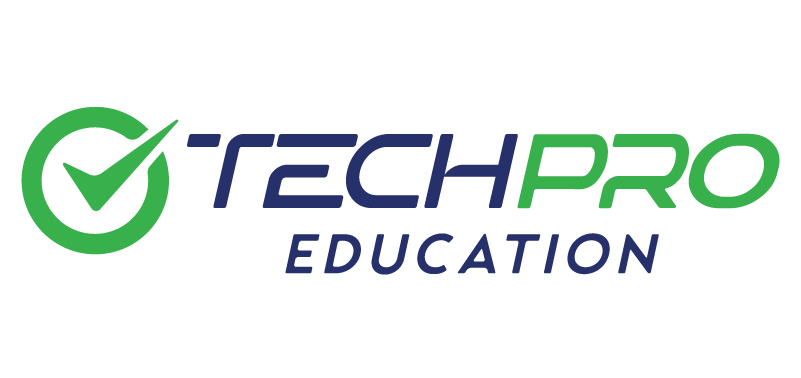